In [63]:
import re
import pandas as pd
from tkinter import *
from tkinter.messagebox import *
import numpy as np
import seaborn as sns; sns.set()
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import ClassifierChain
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

ERROR: Could not find a version that satisfies the requirement skmultilearn (from versions: none)
ERROR: No matching distribution found for skmultilearn
Note: you may need to restart the kernel to use updated packages.


In [67]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [9]:
train_data

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13999,8699,a methodology of automatic detection of a even...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14000,11912,we consider a case inside which the robot has ...,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
14001,4842,despite being usually considered two competing...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
14002,12507,we present the framework and its implementatio...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
stemmer = PorterStemmer()
stop_words = stopwords.words('english')
def removeStopWord(data=[]):
    doc_list=[]
    for text in data:
        # Convert text to lowercase
        text = text.lower()

        # Remove special characters, punctuation, and numbers
        text = re.sub(r"[^a-zA-Z\s]", "", text)

        # Tokenize the text into individual words
        words = text.split()

        words = [word for word in words if word not in stop_words]

        # Stem and lemmatize words
        stemmer = PorterStemmer()
    #     lemmatizer = WordNetLemmatizer()
        words = [stemmer.stem(word) for word in words]


        # Join the processed words back into a single string
        processed_text = " ".join(words)
        
        doc_list.append(processed_text)
    
    return doc_list

In [68]:
#spliting training and testing data
# Split into train and test sets
X_train = train_data['ABSTRACT']
X_test = test_data['ABSTRACT']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
#Remove stopwords from training and testing Data
X_train=removeStopWord(X_train)
X_test=removeStopWord(X_test)

In [74]:
categories = ['Computer Science', 'Physics', 'Mathematics', 'Statistics']
y_train = train_data[categories]
y_test = test_data[categories]

In [75]:
# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', ClassifierChain(MultinomialNB()))
])

In [76]:
# Train the classifier
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('nb', ClassifierChain(base_estimator=MultinomialNB()))])

In [77]:
# predict
predictions = pipeline.predict(X_test)

In [78]:
print('Accuracy = ', accuracy_score(y_test,predictions))
print('F1 score is ',f1_score(y_test, predictions, average="micro"))
print(classification_report(y_test,predictions))

Accuracy =  0.5799733422192602
F1 score is  0.7091633466135459
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      2529
           1       0.99      0.82      0.90      1644
           2       1.00      0.34      0.51      1194
           3       0.97      0.16      0.27      1660

   micro avg       0.88      0.60      0.71      7027
   macro avg       0.94      0.54      0.62      7027
weighted avg       0.92      0.60      0.66      7027
 samples avg       0.69      0.64      0.65      7027



/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


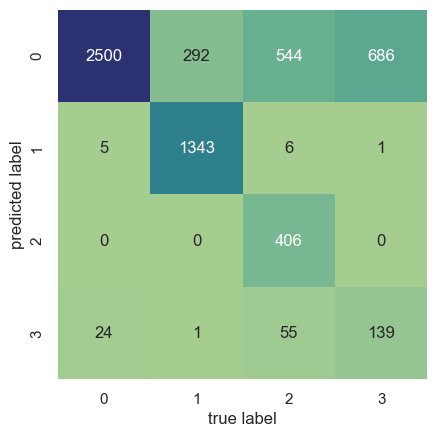

In [96]:
#Confusion Matrix and HeatMap Generation
mat = confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="crest", cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()